# KMeans Clustering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
xl = pd.ExcelFile('EastWestAirlines.xlsx')
print(xl.sheet_names)

['Description', 'data']


In [8]:
air = xl.parse('data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
#air_dec = xl.parse('Description')
#air_dec

In [11]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [12]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaled_air = scaler.fit_transform(air)

In [18]:
scaled_air

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [19]:
from sklearn.cluster import KMeans

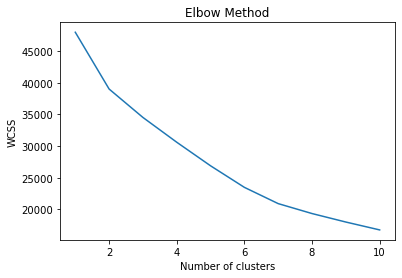

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#Build Cluster algorithm
from sklearn.cluster import KMeans

In [22]:
clusters_new = KMeans(7, random_state=2)
clusters_new.fit(scaled_air)

KMeans(n_clusters=7, random_state=2)

In [31]:
clusters_new.labels_

array([5, 5, 5, ..., 0, 0, 0])

In [25]:
#Assign clusters to the data set
air['clusterid_new'] = clusters_new.labels_

In [80]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,5
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [27]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 9.63339691e-01, -3.39434643e-01, -1.34224694e-01,
        -4.97564822e-01, -9.82418871e-02, -6.27665798e-02,
        -4.61103548e-01, -4.14305997e-01, -1.90128705e-01,
        -2.08274600e-01, -9.54082042e-01, -3.54708064e-01],
       [-2.39353288e-01,  1.15624817e+00,  4.27130442e-01,
         1.43547040e-01, -9.82418871e-02, -6.27665798e-02,
         6.75658572e-01,  1.73742500e+00,  3.78718428e+00,
         4.05609647e+00,  2.82734629e-01,  9.04542364e-01],
       [-3.98729946e-01,  5.13894602e-01, -1.10143228e-01,
         1.36678705e+00, -9.82418871e-02, -5.25623538e-02,
         1.12953550e+00,  8.06003098e-01, -6.44392298e-02,
        -6.88279398e-02,  4.02405073e-01,  6.83079439e-01],
       [ 2.19324852e-01, -4.68896637e-02, -1.56235600e-01,
        -6.68227273e-01,  9.03825361e+00, -6.27665798e-02,
        -1.01665326e-01,  6.17851143e-01,  8.75493989e-02,
         2.20346809e-01, -7.24639805e-02,  5.17838824e-02],
       [-3.01522483e-01,  6.39719256e-01, -8.4432923

In [28]:
air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3135.534506,39387.099459,39.376861,1.374831,1.000000,1.000000,6018.041949,7.620433,193.446549,0.580514,2143.484438,0.198917
1,1,1737.021429,190108.435714,474.528571,2.257143,1.000000,1.000000,33460.614286,28.285714,5762.242857,16.757143,4702.371429,0.807143
2,2,1552.045817,125382.922311,58.911355,3.941235,1.000000,1.001992,44420.810757,19.341633,369.838645,1.112550,4949.476096,0.700199
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,5,1092.863600,56868.155432,57.216495,1.356860,1.000000,1.000793,5725.294211,7.814433,227.027756,0.701031,5715.080095,0.249009
6,6,2083.603448,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724


In [81]:
air.groupby('clusterid_new').agg(['count']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,count,count,count,count,count,count,count,count,count,count,count,count
0,0,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478
1,1,140,140,140,140,140,140,140,140,140,140,140,140
2,2,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
3,3,43,43,43,43,43,43,43,43,43,43,43,43
4,4,15,15,15,15,15,15,15,15,15,15,15,15
5,5,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261
6,6,58,58,58,58,58,58,58,58,58,58,58,58


In [29]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,5
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [35]:
u_labels = np.unique(air)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(air[label == i , 0] , air[label == i , 1] , label = i)
plt.legend()
plt.show()


NameError: name 'label' is not defined

In [64]:
pcaair = air.drop(['clusterid_new', 'ID#'], axis=1)
pcaair

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [65]:
clusterid = air['clusterid_new']
clusterid

0       5
1       5
2       5
3       5
4       2
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: clusterid_new, Length: 3999, dtype: int32

In [36]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(1)
 
#Transform the data
df = pca.fit_transform(air)
 
df.shape

(3999, 1)

In [70]:
DF = pd.DataFrame(df)
DF['Cluster ID'] = clusterid
DF

,0,Cluster ID
0,-46919.229121,5
1,-55768.534985,5
2,-33377.036763,5
3,-60184.879199,5
4,26694.311897,2
...,...,...
3994,-55734.051400,0
3995,-10823.657406,0
3996,812.424425,0
3997,-20307.952944,0


In [2]:
plt.figure(figsize=(8,8))
plt.scatter(air.iloc[:,0],air.iloc[:,1], c=air['clusterid_new'], s=10, cmap='summer')
#plt.scatter(air.iloc[:,2],air.iloc[:,3], c=air['clusterid_new'], s=10, cmap='summer')
#plt.scatter(air.iloc[:,2],air.iloc[:,3], c=air['clusterid_new'], s=80, cmap='summer')
#plt.scatter(air.iloc[:,0],air.iloc[:,1], c=air['clusterid_new'], s=80, cmap='summer')
#plt.scatter(air.iloc[:,0],air.iloc[:,1], c=air['clusterid_new'], s=80, cmap='summer')
#plt.scatter(air.iloc[:,0],air.iloc[:,1], c=air['clusterid_new'], s=80, cmap='summer')


NameError: name 'air' is not defined

<Figure size 576x576 with 0 Axes>

In [79]:
airline = pd.read_csv('Book1.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# DBScan Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
xll = pd.ExcelFile('EastWestAirlines.xlsx')
print(xll.sheet_names)

['Description', 'data']


In [12]:
airdb = xll.parse('data')
airdb

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airdb.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [13]:
airdbs = airdb.drop(columns = 'ID#', axis = 1)
airdbs.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
from sklearn.preprocessing import StandardScaler

In [30]:
stscaler = StandardScaler().fit(airdbs)
X = stscaler.transform(airdbs)

In [31]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [52]:
#Noisy samples are given the label -1.
labels = dbscan.labels_

In [53]:
cl=pd.DataFrame(labels,columns=['cluster'])

In [54]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [37]:
cl['cluster'].unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

In [59]:
airdbscon = pd.concat([airdbs,cl],axis=1)
airdbscon

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [39]:
#pca
from sklearn.decomposition import PCA

In [41]:
pcadb = PCA(2)
 
#Transform the data
dfdb = pcadb.fit_transform(airdbs)
 
dfdb.shape

(3999, 2)

In [48]:
X_principal = pd.DataFrame(dfdb, columns = ['P1', 'P2'])
X_principal

,P1,P2
0,-46925.093928,-12261.074064
1,-55774.433005,-11321.092796
2,-33382.844010,-9667.624355
3,-60190.789770,-10586.106588
4,26688.723243,23617.312320
...,...,...
3994,-55728.616739,-3032.292055
3995,-10818.031010,-15178.993746
3996,818.081233,8228.816271
3997,-20302.359119,-14695.389102


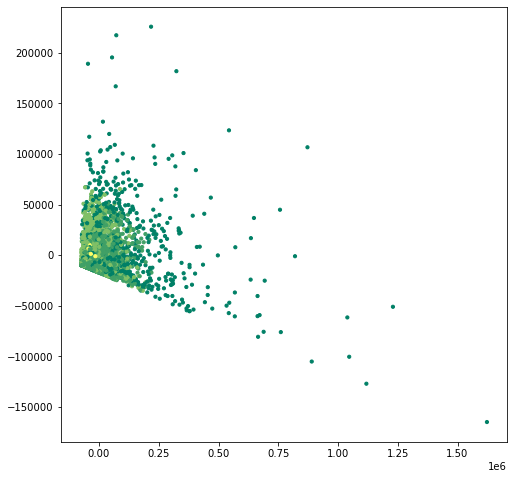

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(X_principal['P1'], X_principal['P2'], c=dbscan.labels_, s=10, cmap='summer')

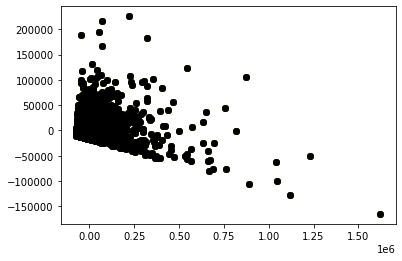

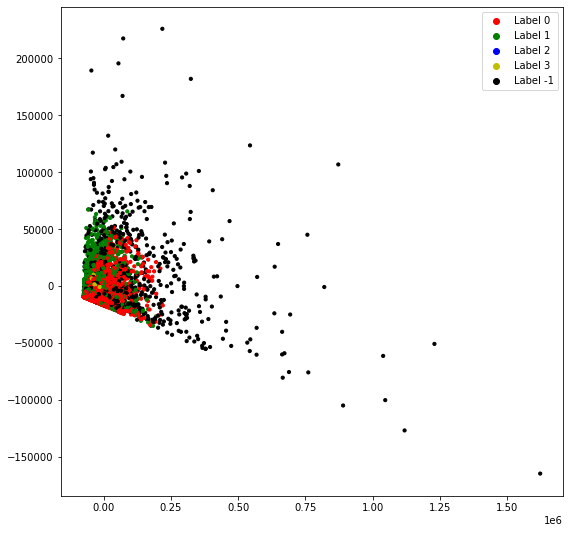

In [58]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec, s=10)
  
# Building the legend
plt.legend((r, g, b, y, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label -1'))
  
plt.show()

In [60]:
airdbscon.groupby('cluster').agg(['count']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,count,count,count,count,count,count,count,count,count,count,count
0,-1,820,820,820,820,820,820,820,820,820,820,820
1,0,2216,2216,2216,2216,2216,2216,2216,2216,2216,2216,2216
2,1,944,944,944,944,944,944,944,944,944,944,944
3,2,12,12,12,12,12,12,12,12,12,12,12
4,3,7,7,7,7,7,7,7,7,7,7,7
